# Lista de exercicio 1

### Q1 - Gerador RANDU
#### Criar uma funcão para Gerador RANDU em R


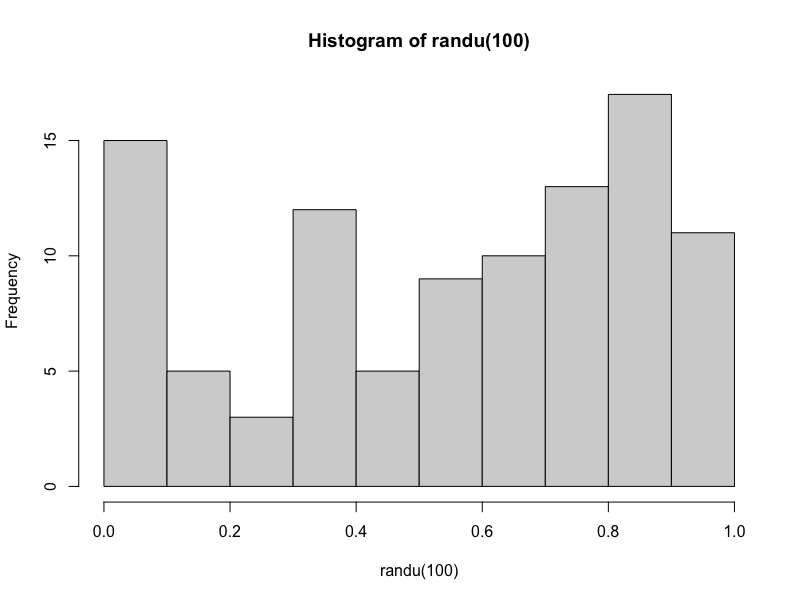

In [2]:
randu <- function(n, seed = 1, modulo = 2^31) {
  x <- seed
  u <- numeric(n) 
  for (i in 1:n) {
    x <- (65539 * x) %% modulo
    u[i] <- x / modulo
  }
  return(u)
}

randu(100) |> hist()

### Q2 - Gerador Aleatorio - sequencia

In [3]:
gerador_seq <- function(n) {
  x <- numeric(n)  
  x[1] <- 23
  x[2] <- 66
  
  for (i in 3:n) {
    x[i] <- (3 * x[i - 1] + 5 * x[i - 2]) %% 100
  }
  
  u <- x / 100
  
  list(xn = x, un = u)
}

In [5]:
n <- 14
resultado <- gerador_seq(n)
resultado$xn

 [1] 23 66 13 69 72 61 43 34 17 21 48 49 87  6

### Q3 - Função de probabilidade
> Usando a função inversa temos:

In [4]:
F_x <- function() {
  repeat {
    u <- runif(1)
    if (u <= 1/3) {
      return(1)
    } else {
      return(2)
    }
  }
}

#### a) n = 100

In [5]:
n = 100
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado  n percent
         1 33    0.33
         2 67    0.67

In [ ]:
n = 1000
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

#### b) n = 1000

In [6]:
n = 1000
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado   n percent
         1 377   0.377
         2 623   0.623

#### c) n = 10000

In [7]:
n = 1000
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado   n percent
         1 303   0.303
         2 697   0.697

### Q4 - Se U ~ (0,1), então:

a) $1 - U => U(0,1)$

b) ${-1\over \lambda} log(U) => exp(\lambda)$

### Q5 - Gerar valores de uma distruibuição de laplace 

In [18]:
dist_laplace <- function(n = 1, a = 0, b = 1){
    U = runif(n)
    X <- ifelse(U <= 0.5, 
      a + b * log(2 * U), 
      a - b * log(2 * (1 - U)))
  return(X)
}

In [38]:
#install.packages('VGAM')

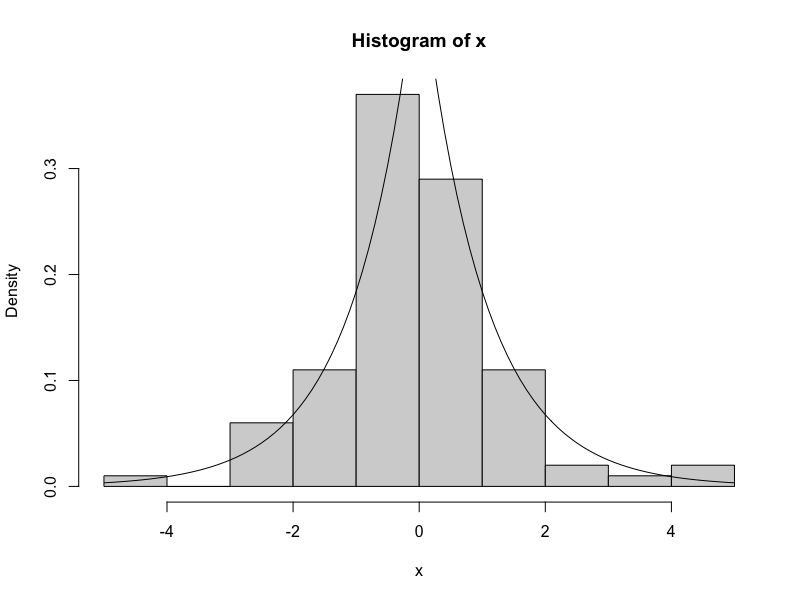

In [49]:
n = 100
a = 0
b = 1
x = dist_laplace(n = n, a = a, b = b)

hist(x, probability = TRUE)
curve(VGAM::dlaplace(x = x, location = a, scale = b), add = TRUE)


### Q6) Fotebol


#### a) Simular resultados dos jogos
$
\omega = \{derrota, empate, triunfo\}
$

In [127]:
F_x <- function(n) {
  resultado <- character(n)
  for (i in 1:n) {
  u <- runif(1)
  resultado[i] <- dplyr::case_when(
    u <= .2 ~ 'Derrota',
    u <= .5 ~ 'Empate',
    TRUE ~ 'Triunfo'
  )
  }
  return(resultado)
}

F_x(n=19) |> janitor::tabyl() |> print()

 F_x(n = 19)  n   percent
     Derrota  4 0.2105263
      Empate  4 0.2105263
     Triunfo 11 0.5789474


#### b) Simulação de resultado

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   28.00   35.00   33.13   38.00   45.00 


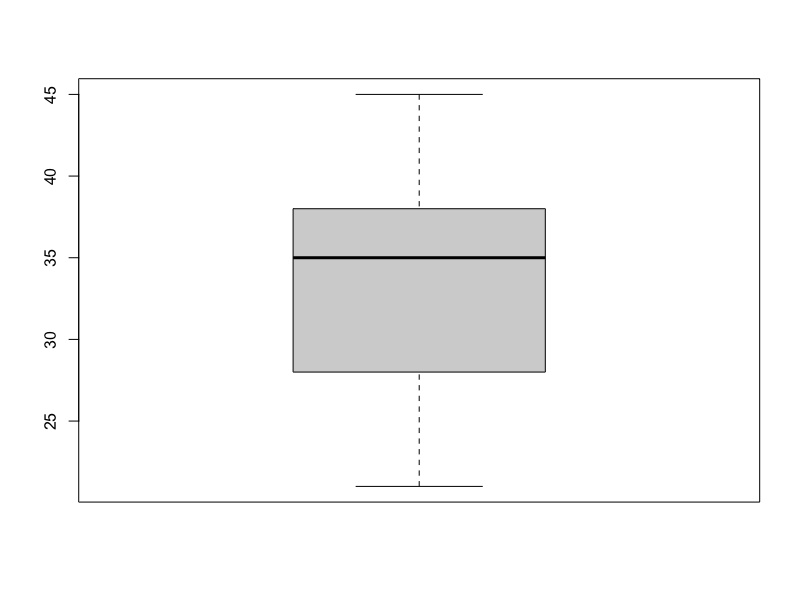

In [223]:
simular_campanha <- function(n_camp){
  resultado_camp <- numeric(n_camp)
  for(i in 1:n_camp) {
   resultado_camp[i] <- as.numeric(sum(table(F_x(n = 19))*c(0, 1, 3)))
  }
  return(resultado_camp)
  }

resultados = simular_campanha(n_camp = 15) 
summary(resultados) |> print()
resultados |> boxplot()